# Climate Change Sonification
## Data Analysis

This code was used for the Bachelor's thesis 'Data Sonification' at the UvA submitted by IRM Folpmers. The sections mentioned in this code relate to the corresponding thesis.

In [1]:
import os, sys
import numpy as np
import pandas as pd
from tqdm import tqdm
from netCDF4 import Dataset
from scipy import signal
from astronify.series import SoniSeries
from astropy.table import Table

import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import animation 
from IPython.display import HTML, Image
from matplotlib import rcParams
rcParams["font.family"] = "Times New Roman"
rcParams["savefig.dpi"] = 300
# rcParams['animation.html'] = 'html5'


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [2]:
def process_data(frequency):
    PATH = f"data/{frequency}/"
    files = sorted([ f for f in os.listdir(path=PATH) if f.endswith(".nc4") ])
    print(len(files), "files to be read.")

    co2_data = []
    for f in files:
        try:
            co2_data.append(Dataset(PATH + f).variables["XCO2"][:])
        except:
            pass
    print(len(files) - len(co2_data), "files could not be read.")
    print("Size:", sum([sys.getsizeof(d) for d in co2_data]), "bytes")

    return co2_data, files


def animate_co2(frequency="monthly", savepath=None):

    # set up plotting area
    fig, ax = plt.subplots()
    ax.tick_params(
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False
    )

    # colorbar
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="5%", pad="2%")
    cmap = mpl.cm.inferno
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cb = mpl.colorbar.ColorbarBase(
        cax, 
        cmap=cmap,
        norm=norm,
        orientation="vertical"
    )

    def plot_img(data):
        """Plot CO2 values"""
#         data = np.flip(data, axis=0)
        im = ax.pcolormesh(
            data,
            cmap=cmap, 
            vmin=vmin, 
            vmax=vmax,
            animated=True,
            rasterized=True
        )
        return im, 

    # for blitting (optimized raster image animation)
    im, = plot_img(co2_data[0][0,:,:])

    def update(i):  
        im, = plot_img(co2_data[i][0,:,:])

        # axis title
        if frequency == "daily":
            date = files[i].split("_")[4]
            ax.set_title(date[-2:] + " - " + date[-4:-2] + " - " + date[:-4])
        elif frequency == "monthly":
            date = files[i].split("_")[4]
            ax.set_title(date[-2:] + " - " + date[:-2])
        return im,

    # animate
    ani = animation.FuncAnimation(
        fig, 
        update, 
        frames=len(files), 
        interval=500, 
        repeat=True, 
        repeat_delay=1000,
        blit=True 
    )

    # save and display
    plt.tight_layout()
    
    if savepath is not None:
        ani.save(savepath, writer="imagemagick")
    
    return ani

In [3]:
# Calculates derivative
def der(means):
    deriv = [0]
    for i in range(len(means)-1):
        deriv.append(means[i+1]-means[i])
    return deriv

# Calculates means, standard deviations, minimums and maximums
def calculate_all(part):
    means = np.array([ d.mean() for d in part ])
    stds = np.array([ d.std() for d in part ])
    mins = np.array([ d.min() for d in part ])
    maxs = np.array([ d.max() for d in part ])
    return means, stds, mins, maxs

dates_monthly = np.array(pd.date_range(start='01/2015', end='11/2021', freq='M'))
dates_daily = np.array(pd.date_range(start='01/2015', end='11/2021', freq='d'))[:-2]

# Monthly Data

In [4]:
co2_data, files = process_data("monthly")
vmin = min([ d.min() for d in co2_data ])
vmax = max([ d.max() for d in co2_data ])

82 files to be read.


/Users/irisfolpmers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


0 files could not be read.
Size: 14432 bytes


In [5]:
# Global statistics
means, stds, mins, maxs = calculate_all(co2_data)

## Visualizations (section 3.2)

### Global CO$_2$ emissions means, mins, maxs and standard deviations

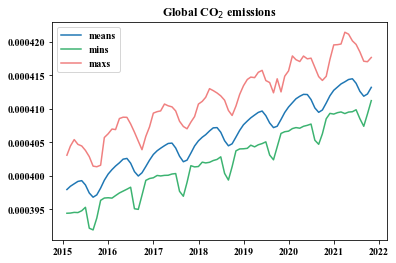

In [6]:
# means, minimums and maximums
plt.plot(dates_monthly, means, label="means")
plt.plot(dates_monthly, mins, label="mins", c="mediumseagreen")
plt.plot(dates_monthly, maxs, label="maxs", c="lightcoral")
plt.title("Global CO$_2$ emissions")
plt.legend()
plt.show()

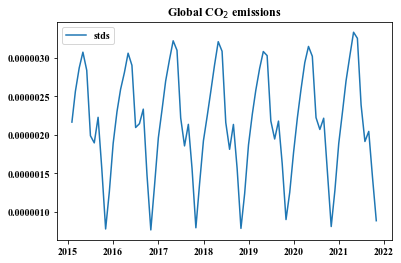

In [7]:
# standard deviations
plt.plot(dates_monthly, stds, label="stds")
plt.title("Global CO$_2$ emissions")
plt.legend()
plt.show()

### Detrended version of the global CO$_2$ emissions means

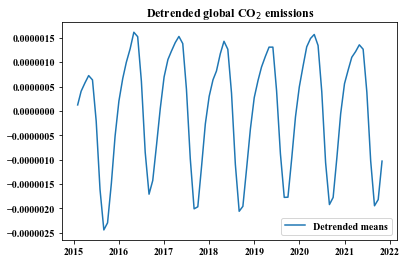

In [8]:

means_detrended = signal.detrend(means)
plt.plot(dates_monthly, means_detrended, label="Detrended means")
plt.legend()
plt.title("Detrended global CO$_2$ emissions")
plt.show()

### Derivatives of the global CO$_2$ emissions means, maximums, minimums and standard deviations

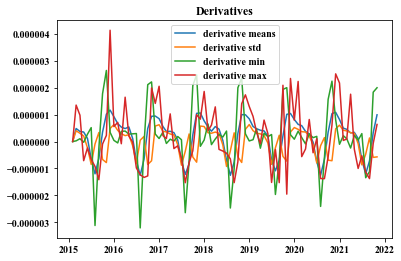

In [9]:
# derivatives of the global CO2 emissions means, maximums, minimums and standard deviations
deriv_means = der(means)
deriv_std = der(stds)
deriv_min = der(mins)
deriv_max = der(maxs)
plt.plot(dates_monthly, deriv_means, label="derivative means")
plt.plot(dates_monthly, deriv_std, label="derivative std")
plt.plot(dates_monthly, deriv_min, label="derivative min")
plt.plot(dates_monthly, deriv_max, label="derivative max")
plt.title("Derivatives")
plt.legend()
plt.show()

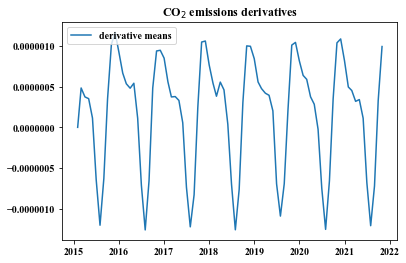

In [10]:
# derivative of the means of the global CO2 emissions
plt.plot(dates_monthly, deriv_means, label="derivative means")
plt.title("CO$_2$ emissions derivatives")
plt.legend()
plt.show()

## Northern hemisphere

In [11]:
co2_data_np = np.array(co2_data)
shape = list(co2_data_np.shape)

first_part = co2_data_np[:, :, 0:int(shape[2]/2), 0:int(shape[3]/2)]
second_part = co2_data_np[:, :, int(shape[2]/2):, 0:int(shape[3]/2)]
third_part = co2_data_np[:, :, 0:int(shape[2]/2), int(shape[3]/2):]
fourth_part = co2_data_np[:, :, int(shape[2]/2):, int(shape[3]/2):]

northern_part = co2_data_np[:, :, 0:int(shape[2]/2), :]

In [12]:
northern_means, northern_stds, northern_mins, northern_maxs = calculate_all(northern_part)  

### Northern hemisphere CO$_2$ emissions Means, minimums and maximums

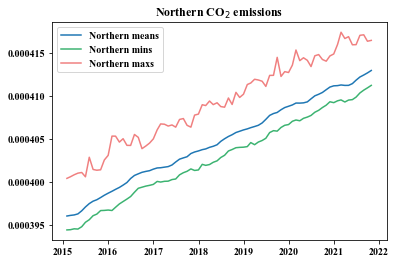

In [13]:
# The means, minimums and maximums of the CO2 emissions on the Northern hemisphere
# Also used for the evaluation (section 4.1.2)
_, ax5 = plt.subplots()
ax5.plot(dates_monthly, northern_means, label="Northern means")
ax5.plot(dates_monthly, northern_mins, label="Northern mins", c="mediumseagreen")
ax5.plot(dates_monthly, northern_maxs, label="Northern maxs", c="lightcoral")

plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

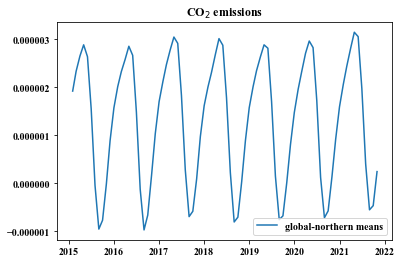

In [14]:
plt.plot(dates_monthly, means-northern_means, label="global-northern means")
plt.legend()
plt.title("CO$_2$ emissions")
plt.savefig("globalnortherndiff")
# plt.show()

### Detrended version of the Northern hemisphere CO$_2$ emissions means, minimums, maximums and standard deviations

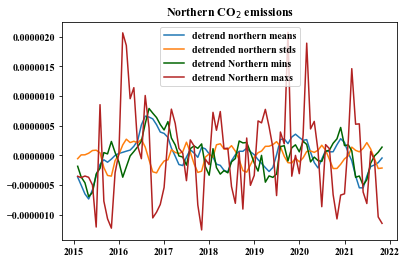

In [15]:
# Detrended version of the Northern hemisphere CO2 emissions means, maximums, minimums and standard deviations
_, ax5 = plt.subplots()
ax5.plot(dates_monthly, signal.detrend(northern_means), label="detrend northern means")
ax5.plot(dates_monthly, signal.detrend(northern_stds), label="detrended northern stds")
ax5.plot(dates_monthly, signal.detrend(northern_mins), label="detrend Northern mins", c="darkgreen")
ax5.plot(dates_monthly, signal.detrend(northern_maxs), label="detrend Northern maxs", c="firebrick")

plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

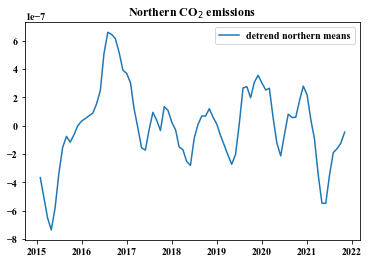

In [16]:
# Detrended version of the Northern hemisphere CO2 emissions means
# Also used for the evaluation (section 4.1.2)
_, ax5 = plt.subplots()
ax5.plot(dates_monthly, signal.detrend(northern_means), label="detrend northern means")

plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

### Derivatives of the Northern hemisphere CO$_2$ emissions means, maximums, minimums and standard deviations

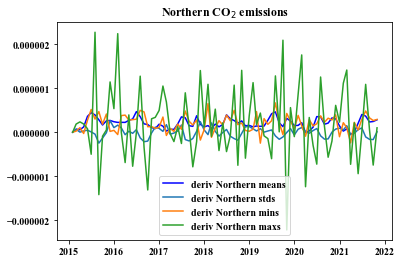

In [17]:
# Derivative of the Northern hemisphere CO2 emissions means, maximums, minimums and standard deviations
# Also used for the evaluation (section 4.1.2)
_, ax5 = plt.subplots()
ax5.plot(dates_monthly, der(northern_means), label="deriv Northern means", c="blue")
ax5.plot(dates_monthly, der(northern_stds), label="deriv Northern stds")
ax5.plot(dates_monthly, der(northern_mins), label="deriv Northern mins")
ax5.plot(dates_monthly, der(northern_maxs), label="deriv Northern maxs")
plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

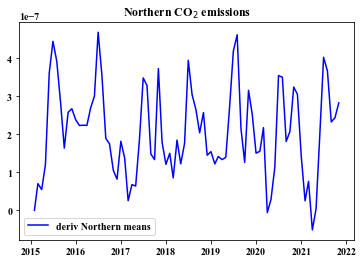

In [18]:
# Derivative of the Northern hemisphere CO2 emissions means
_, ax5 = plt.subplots()
ax5.plot(dates_monthly, der(northern_means), label="deriv Northern means", c="blue")

plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

## Animation

The animation of the detrended northern means. This is made to provide data information with the sonification. In case this animation does not work, uncomment the first line.

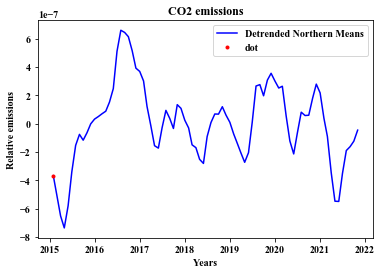

In [19]:
# %matplotlib notebook

fig, ax = plt.subplots()
ax.plot(dates_monthly, signal.detrend(northern_means), label="Detrended Northern Means", color="blue")

def animate(i):
    return ax.plot(dates_monthly[i], [signal.detrend(northern_means)[i]], 'r.', label="dot")

myAnimation = animation.FuncAnimation(fig, animate, frames=len(signal.detrend(northern_means)), interval=100, blit=True, repeat=True)

plt.title("CO2 emissions")
plt.xlabel("Years")
plt.ylabel("Relative emissions")
plt.legend()
plt.show()

# Data Sonification
## Monthly Data

The data sonifications corresponding to the visualizations created above. Some of the sonifications were used for the project's evaluation (section 4.1). All created with the use of Astronify.

### Global CO$_2$ emissions means

In [20]:

data_table = Table({"time": range(len((der(northern_means)))),
                    "flux": der(northern_means)})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.3
data_soni.sonify()
data_soni.play()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


### Detrended version of the means of the Northern CO$_2$ emissions

In [21]:
data_table = Table({"time": range(len(signal.detrend(northern_means))),
                    "flux": signal.detrend(northern_means)})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.3
data_soni.sonify()
data_soni.play()

#### Animation

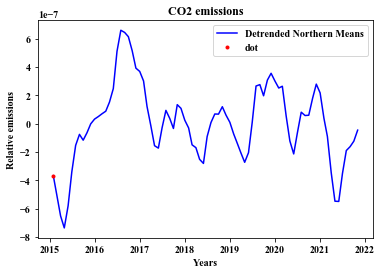

In [22]:
# Sonification
data_table = Table({"time": range(len(signal.detrend(northern_means))),
                    "flux": signal.detrend(northern_means)})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.3
data_soni.sonify()

# Animation
fig, ax = plt.subplots()
ax.plot(dates_monthly, signal.detrend(northern_means), label="Detrended Northern Means", color="blue")
myAnimation = animation.FuncAnimation(fig, animate, frames=len(signal.detrend(northern_means)), interval=290, blit=True, repeat=True)


plt.legend()
plt.title("CO2 emissions")
plt.xlabel("Years")
plt.ylabel("Relative emissions")
plt.show()


### Derivative of the means of the Northern CO$_2$ emissions

In [23]:
data_table = Table({"time": range(len(der(northern_means))),
                    "flux": der(northern_means)})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.3
data_soni.pitch_mapper.pitch_map_args["center_pitch"] = 500 
data_soni.sonify()

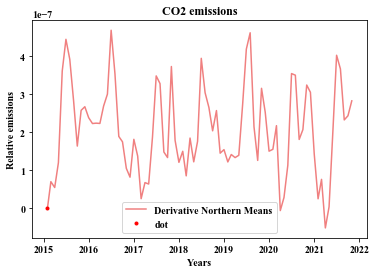

In [24]:
# Sonification
data_table = Table({"time": range(len(der(northern_means))),
                    "flux": der(northern_means)})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.3
data_soni.pitch_mapper.pitch_map_args["center_pitch"] = 500 
data_soni.sonify()


# Animation
def animate(i):
    return ax.plot(dates_monthly[i], [der(northern_means)[i]], 'r.', label="dot")

fig, ax = plt.subplots()
ax.plot(dates_monthly, der(northern_means), label="Derivative Northern Means", color="lightcoral")
myAnimation = animation.FuncAnimation(fig, animate, frames=len(der(northern_means)), interval=290, blit=True, repeat=True)

plt.legend()
plt.title("CO2 emissions")
plt.xlabel("Years")
plt.ylabel("Relative emissions")
plt.show()

# data_soni.play()

## Multiple sonifications

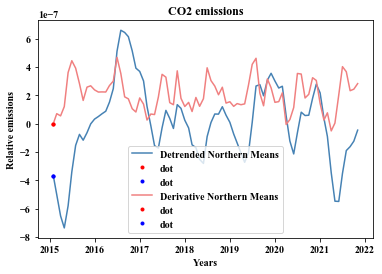

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [25]:
def animate(i):
    ax.plot(dates_monthly[i], [der(northern_means)[i]], 'r.', label="dot")
    return ax.plot(dates_monthly[i], [signal.detrend(northern_means)[i]], 'b.', label="dot")

fig, ax = plt.subplots()
ax.plot(dates_monthly, signal.detrend(northern_means), label="Detrended Northern Means", color="steelblue")
myAnimation = animation.FuncAnimation(fig, animate, frames=len(signal.detrend(northern_means)), interval=290, blit=True, repeat=True)


ax.plot(dates_monthly, der(northern_means), label="Derivative Northern Means", color="lightcoral")
myAnimation = animation.FuncAnimation(fig, animate, frames=len(der(northern_means)), interval=295, blit=True, repeat=True)



plt.legend()
plt.title("CO2 emissions")
plt.xlabel("Years")
plt.ylabel("Relative emissions")
plt.show()



data_table1 = Table({"time": range(len(signal.detrend(northern_means))),
                    "flux": signal.detrend(northern_means)})

data_soni1 = SoniSeries(data_table1)
data_soni1.note_spacing = 0.3
data_soni1.pitch_mapper.pitch_map_args["center_pitch"] = 500 
data_soni1.sonify()
data_soni1.play()


data_table2 = Table({"time": range(len(der(northern_means))),
                    "flux": der(northern_means)})

data_soni2 = SoniSeries(data_table2)
data_soni2.note_spacing = 0.3
data_soni2.pitch_mapper.pitch_map_args["center_pitch"] = 500 
data_soni2.sonify()
data_soni2.play()





## Evaluation

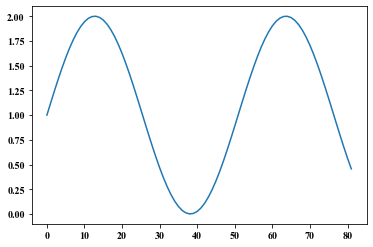

In [26]:
x = range(82)
y = 1+np.sin(np.linspace(0, 10, 82))
plt.plot(x, y)
plt.show()

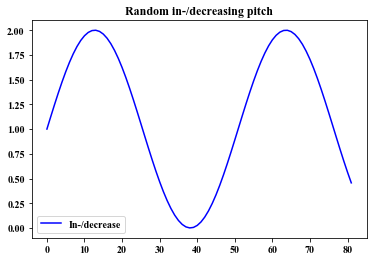

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [27]:
#  %matplotlib notebook

fig, ax = plt.subplots()
ax.plot(x, y, label="In-/decrease", color="blue")


plt.legend()
plt.title("Random in-/decreasing pitch")
plt.show()

data_table = Table({"time": range(len(x)),
                    "flux": y})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.3
data_soni.pitch_mapper.pitch_map_args["center_pitch"] = 200 
data_soni.sonify()
data_soni.play()


# Daily data
The visualizations created in this section correspond to section 3.2.4 of the Thesis. Not all analyses that were performed on the monthly data were also performed on the daily data.

In [28]:
# Load data
daily_co2_data, files = process_data("daily")
vmin = min([ d.min() for d in daily_co2_data ])
vmax = max([ d.max() for d in daily_co2_data ])

2495 files to be read.


/Users/irisfolpmers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


0 files could not be read.
Size: 439120 bytes


## Analysis

In [29]:
# Calculate global statistics
daily_means, daily_stds, daily_mins, daily_maxs = calculate_all(daily_co2_data)

In [30]:
# Calculate Northern hemisphere statistics
daily_northern_part = np.array(daily_co2_data)[:, :, 0:int(361/2), :]

# Calculate means, maximums, minimums and standard deviations of the Northern hemisphere CO2 emissions
daily_northern_means = np.array([ d.mean() for d in daily_northern_part ])
daily_northern_stds = np.array([ d.std() for d in daily_northern_part ])
daily_northern_mins = np.array([ d.min() for d in daily_northern_part ])
daily_northern_maxs = np.array([ d.max() for d in daily_northern_part ])

### Northern hemisphere CO$_2$ emissions means, mins, maxs and standard deviations

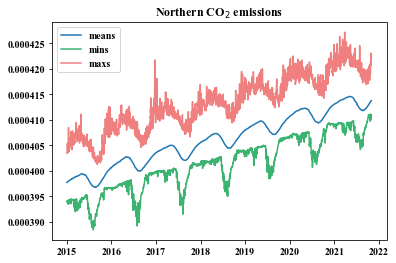

In [31]:
_, ax5 = plt.subplots()
ax5.plot(dates_daily, daily_means, label="means")
ax5.plot(dates_daily, daily_mins, label="mins", c="mediumseagreen")
ax5.plot(dates_daily, daily_maxs, label="maxs", c="lightcoral")
plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

### Northern hemisphere CO$_2$ emissions means, mins, maxs and standard deviations

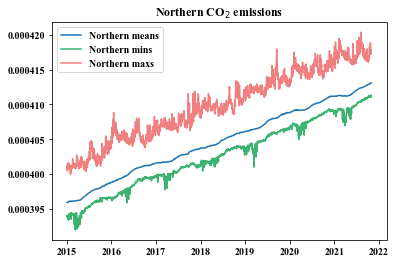

In [32]:
_, ax5 = plt.subplots()
ax5.plot(dates_daily, daily_northern_means, label="Northern means")
ax5.plot(dates_daily, daily_northern_mins, label="Northern mins", c="mediumseagreen")
ax5.plot(dates_daily, daily_northern_maxs, label="Northern maxs", c="lightcoral")
plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

### Detrended version of the Northern hemisphere CO$_2$ emissions means

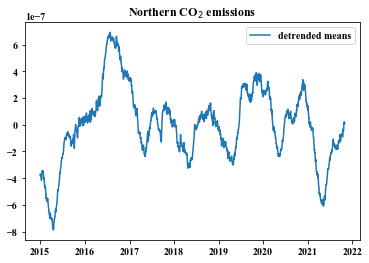

In [33]:
plt.plot(dates_daily, signal.detrend(daily_northern_means), label="detrended means")
plt.title("Northern CO$_2$ emissions")
plt.legend()
plt.show()

### Derivative of the Northern hemisphere CO$_2$ emissions means

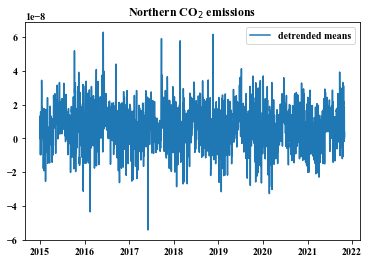

In [34]:
plt.plot(dates_daily, der(daily_northern_means), label="detrended means")
plt.title("Northern CO$_2$ emissions")
plt.legend()
plt.show()

# Runtime differences
The following cells show how the runtime mentioned in section 3.2.4 of the Thesis was calculated. First the kernel was restarted, then the first 3 cells were run, finally the corresponding part (Monthly or Daily) was run. 

## Monthly

### Loading the data

In [ ]:
start_time = time.time()

co2_data, files = process_data("monthly")
vmin = min([ d.min() for d in co2_data ])
vmax = max([ d.max() for d in co2_data ])

print("Time:", time.time() - start_time, "seconds")

### Global CO$_2$ emissions means

In [ ]:
start_time = time.time()

means = np.array([ d.mean() for d in co2_data ])

print("Time:", time.time() - start_time, "seconds")

### Calculating the Northern hemisphere CO$_2$ emissions and the corresponding means

In [ ]:
start_time = time.time()

# co2_data_np = np.array(co2_data)
# shape = list(co2_data_np.shape)
northern_part = np.array(co2_data)[:, :, 0:int(361/2), :]
northern_means = np.array([ d.mean() for d in northern_part ])

print("Time:", time.time() - start_time, "seconds")

### Plotting the derivative of the Northern hemisphere CO$_2$ emissions means

In [ ]:
start_time = time.time()

plt.plot(dates_monthly, der(northern_means), label="deriv Northern means", c="blue")
plt.legend()
plt.title("Northern CO$_2$ emissions")
plt.show()

print("Time:", time.time() - start_time, "seconds")

## Daily

### Loading the data

In [ ]:
start_time = time.time()

daily_co2_data, files = process_data("daily")
vmin = min([ d.min() for d in daily_co2_data ])
vmax = max([ d.max() for d in daily_co2_data ])

print("Time:", time.time() - start_time, "seconds")

### Global CO$_2$ emissions means

In [ ]:
start_time = time.time()

daily_means = np.array([ d.mean() for d in daily_co2_data ])

print("Time:", time.time() - start_time, "seconds")

### Calculating the Northern hemisphere CO$_2$ emissions and the corresponding means

In [ ]:
start_time = time.time()

daily_northern_part = np.array(daily_co2_data)[:, :, 0:int(361/2), :]
daily_northern_means = np.array([ d.mean() for d in daily_northern_part ])

print("Time:", time.time() - start_time, "seconds")

### Plotting the derivative of the Northern hemisphere CO$_2$ emissions means

In [ ]:
start_time = time.time()

plt.plot(dates_daily, der(daily_northern_means), label="detrended means")
plt.title("Northern CO$_2$ emissions")
plt.legend()
plt.show()

print("Time:", time.time() - start_time, "seconds")